<a href="https://colab.research.google.com/github/aaa0034213/2024-1-my-BDA/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

df = sns.load_dataset(('titanic'))
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 22.2 MB/s eta 0:00:00


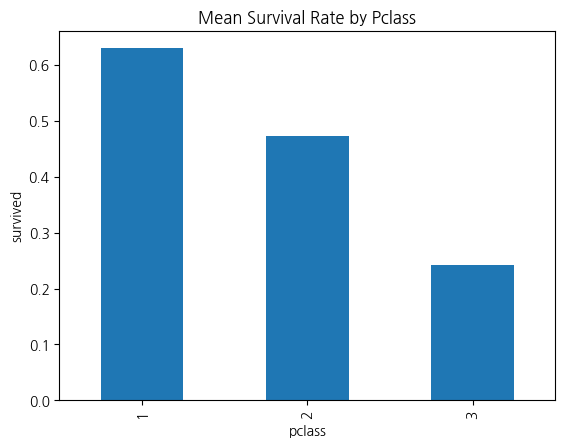

In [5]:
# 클래스별 평균 생존
import koreanize_matplotlib
import pandas as pd
import matplotlib.pyplot as plt

df.groupby('pclass')['survived'].mean().plot(kind='bar')
plt.xlabel('pclass')
plt.ylabel('survived')
plt.title('Mean Survival Rate by Pclass')
plt.show()

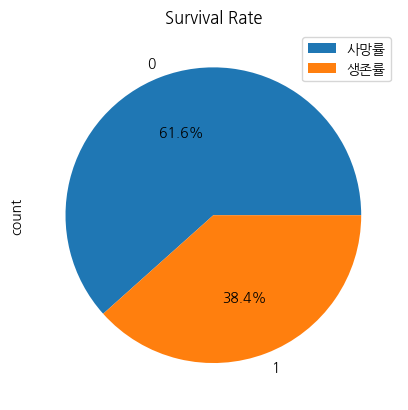

In [12]:
# 생존률 원 그래프

df['survived'].value_counts().plot(kind='pie', autopct = '%1.1f%%' )
plt.title('Survival Rate')
plt.legend(labels=['사망률', '생존률'])

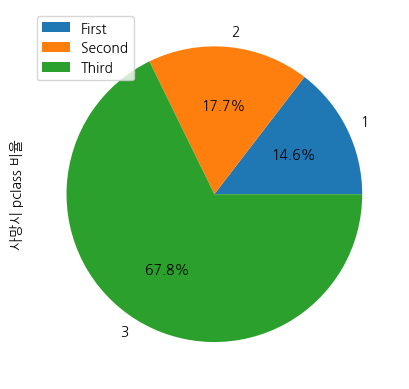

In [14]:
# 위를 통해서 구체적으로 생존하지 못한 클래스 %

df[df['survived']==0]['pclass'].value_counts().sort_index().plot(kind='pie', autopct = '%1.1f%%')
plt.ylabel('사망시 pclass 비율')
plt.legend(labels=['First', 'Second', 'Third'],loc="upper left")

Text(0.5, 1.0, 'dead_mean_age_by_class')

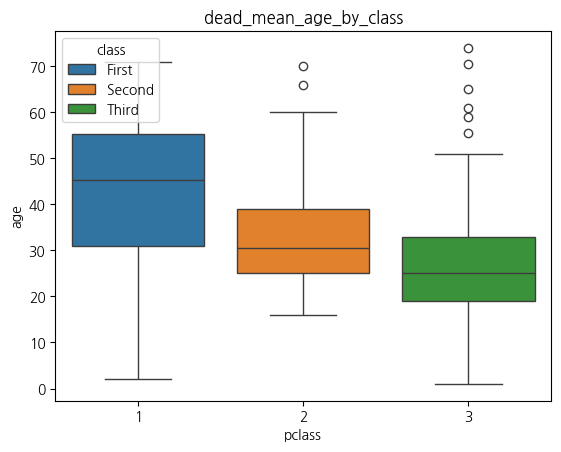

In [ ]:
# 각 클래스별 사망자 평균 나이 botplot

dead_mean_age_by_class = df[df['survived']== 0].groupby('pclass')['age'].mean().reset_index()

sns.boxplot(df[df['survived']==0],x='pclass', y='age', hue='class')
plt.title('dead_mean_age_by_class')

In [ ]:
# 탑승객 평균 나이
df['age'].mean()

29.69911764705882

<Axes: xlabel='age', ylabel='Count'>

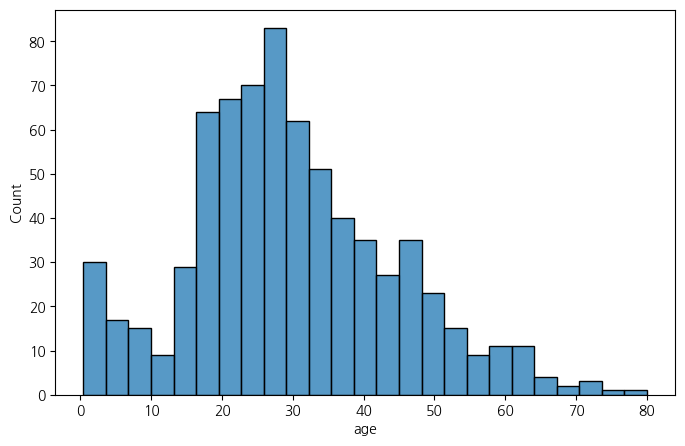

In [ ]:
# 탑승객 주요 나이
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=25)

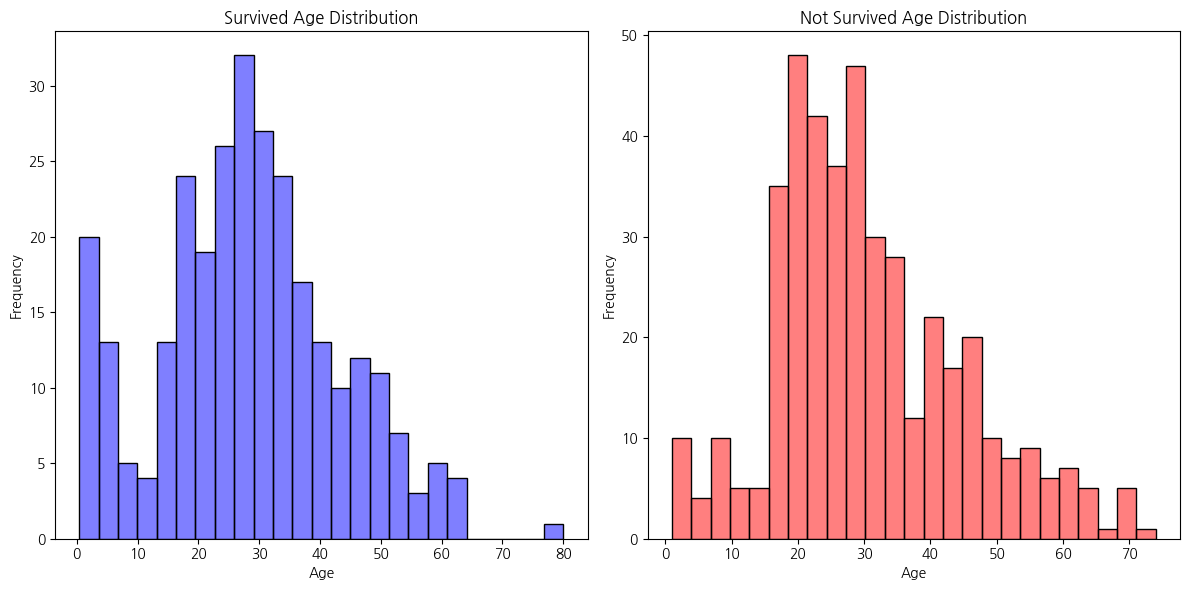

In [ ]:
# 생존자와 비생존자의 연령 분포 hist

# 생존자와 비생존자 데이터 생성
sur = df[df['survived'] == 1]
dead = df[df['survived'] == 0]


plt.figure(figsize=(12, 6))

# 생존자
plt.subplot(1, 2, 1)
sns.histplot(sur['age'], bins=25, color='blue', alpha=0.5)
plt.title('생존자 연령표')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 사망자
plt.subplot(1, 2, 2)
sns.histplot(dead['age'], bins=25, color='red', alpha=0.5)
plt.title('사망자 연령표')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



<ipython-input-19-dbba1cc8aeda>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='pclass', y='age', data=df, palette='viridis')


Text(0, 0.5, 'Age')

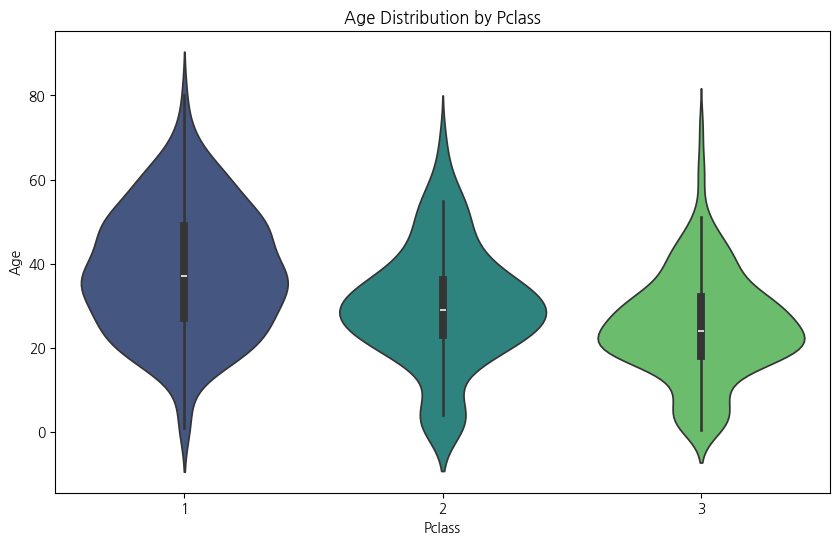

In [ ]:
# 바이올린 그래프로 'age' 시각화 (pclass 별 평균 나이)

plt.figure(figsize=(10, 6))
sns.violinplot(x='pclass', y='age', data=df, palette='viridis')
plt.title('Age Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')


<ipython-input-75-a6c866286bcb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='alone', y='survived', palette='viridis')


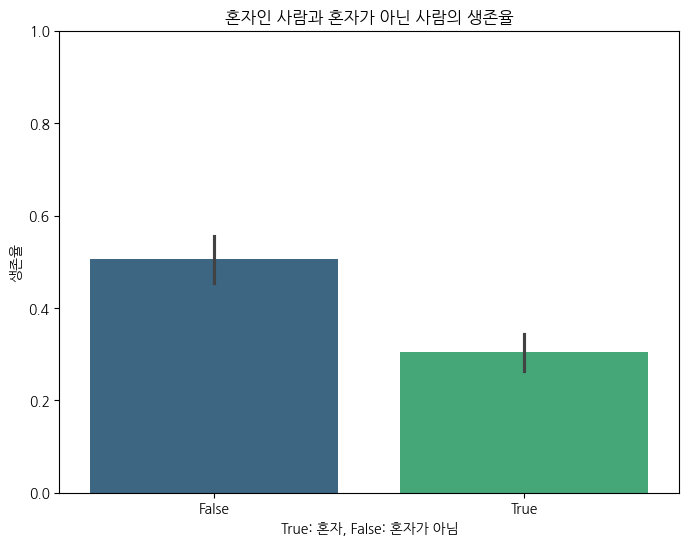

In [ ]:
# 혼자인 사람 혼자가 아닌 사람 생존율
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='alone', y='survived', palette='viridis')
plt.title('혼자인 사람과 혼자가 아닌 사람의 생존율')
plt.xlabel('True: 혼자, False: 혼자가 아님')
plt.ylabel('생존율')
plt.ylim(0, 1)
plt.show()


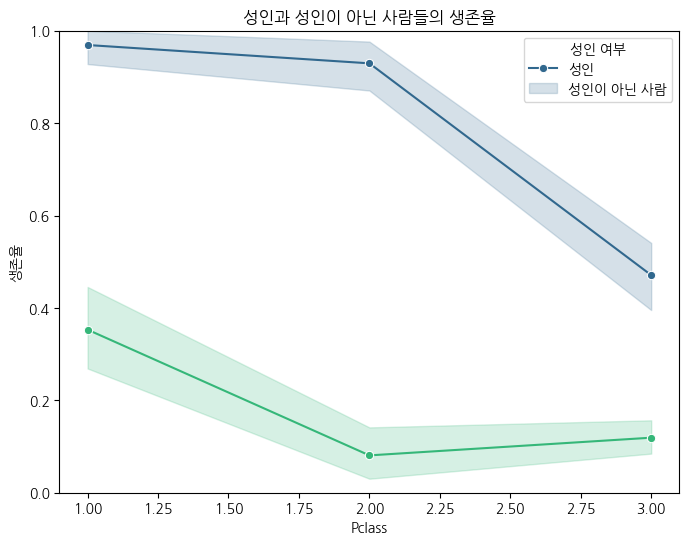

In [ ]:
# 선 그래프 성인 or 성인 아닌 생존율
df = sns.load_dataset('titanic')

plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='pclass', y='survived', hue='adult_male', marker='o', palette='Set1')
plt.title('성인과 성인이 아닌 사람들의 생존율')
plt.xlabel('pclass')
plt.ylabel('생존율')
plt.legend(title='성인 여부', labels=['성인', '성인이 아닌 사람'])
plt.ylim(0, 1)
plt.show()




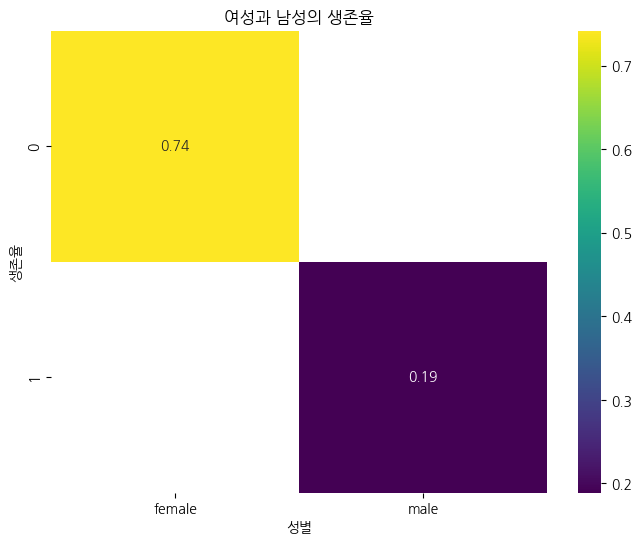

In [ ]:
# 남성 여성 생존율 히트맵으로 나타내기

# 성별에 따른 생존율 계산
survival_rates = df.groupby('sex')['survived'].mean().reset_index()

# 히트맵으로 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(data=survival_rates.pivot(columns='sex', values='survived'), annot=True, cmap='viridis', fmt=".2f")
plt.title('여성과 남성의 생존율')
plt.xlabel('성별')
plt.ylabel('생존율')
plt.show()
